In [1]:
'''
Load data
'''
import json
with open("fileStats.json", "r") as f:
    content = f.read()
    data = json.loads(content)


In [6]:
import string
def updateDict(d, items):
    for item in items:
        if item not in d.keys():
            d[item] = 0

def updateCounts(d, items, counts):
    for i in range(0, len(counts)):
        d[items[i]] += counts[i]

def digitDict():
    d = {}
    for i in range(0,10):
        d[i] = 0
    return d

def charDict():
    d = {}
    chars = [x for x in string.ascii_lowercase]
    for char in chars:
        d[char] = 0
    return d

In [ ]:
'''
Aggregate all data
'''
aggData = {'Words': {}, 'Numbers': {}, 'Characters': charDict(), 'Digits': digitDict()}
numEntries = len(data['stats'])
c = 0
for entry in data['stats']:
    # Log
    c += 1
    print(f'Processing file {c} of {numEntries}')

    # Get words
    words = entry['allWords']
    wordCounts = entry['wordCounts']

    # Update word dictionary
    updateDict(aggData['Words'], words)
    updateCounts(aggData['Words'], words, wordCounts)

    # Get numbers
    numbers = entry['allNumbers']
    numCounts = entry['numCounts']

    # Update number dictionary
    updateDict(aggData['Numbers'], numbers)
    updateCounts(aggData['Numbers'], numbers, numCounts)

    # Update digits
    for num in numbers:
        firstDigit = int(str(num)[0])
        aggData['Digits'][firstDigit] += 1
    
    # Update first character
    for word in words:
        firstChar = word[0]
        aggData['Characters'][firstChar] += 1

# Write to aggregate JSON
jsonString = json.dumps(aggData)
with open("aggStats.json", "w") as f:
    f.write(jsonString)

Processing file 1 of 1
Processing file 2 of 1
Processing file 3 of 1
Processing file 4 of 1
Processing file 5 of 1
Processing file 6 of 1
Processing file 7 of 1
Processing file 8 of 1
Processing file 9 of 1
Processing file 10 of 1
Processing file 11 of 1
Processing file 12 of 1
Processing file 13 of 1
Processing file 14 of 1
Processing file 15 of 1
Processing file 16 of 1
Processing file 17 of 1
Processing file 18 of 1
Processing file 19 of 1
Processing file 20 of 1
Processing file 21 of 1
Processing file 22 of 1
Processing file 23 of 1
Processing file 24 of 1
Processing file 25 of 1
Processing file 26 of 1
Processing file 27 of 1
Processing file 28 of 1
Processing file 29 of 1
Processing file 30 of 1
Processing file 31 of 1
Processing file 32 of 1
Processing file 33 of 1
Processing file 34 of 1
Processing file 35 of 1
Processing file 36 of 1
Processing file 37 of 1
Processing file 38 of 1
Processing file 39 of 1
Processing file 40 of 1
Processing file 41 of 1
Processing file 42 of 1
P

In [32]:
fit

array([-1.53489005,  6.08171415])

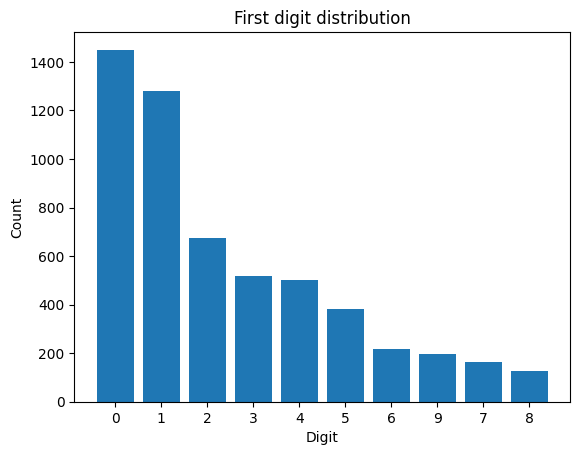

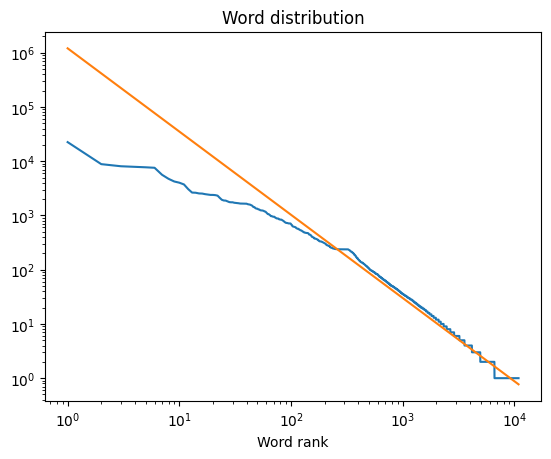

In [8]:
''' Plot aggregate data '''
from Plotter import Plotter
import json
import matplotlib.pyplot as plt
import numpy as np

# Load data
with open("aggStats.json", "r") as f:
    content = f.read()
    aggData = json.loads(content)

# Set up plotter
plotter = Plotter()

# Benford's law: First digit
plt.figure()
digitCounts = list(aggData['Digits'].values()) 
plotter.plotDigitDistribution(digitCounts)

# Zipf's law: Word frequency
wordCounts = list(aggData['Words'].values())
f = plt.figure()
plotter.plotWordDistribution(wordCounts, "All", False) # Log-log line

# Fit word log of word frequency to a line
logCounts = np.log10(wordCounts)
logRank = np.log10(list(range(1, len(wordCounts) + 1)))
fit = np.polyfit(logRank, logCounts, 1)
fitX = np.linspace(1, len(wordCounts), len(wordCounts))
fitY = pow(fitX, fit[0]) * pow(10, fit[1])

ax = f.axes[0]
ax.plot(fitX, fitY)

AttributeError: Figure.set() got an unexpected keyword argument 'title'

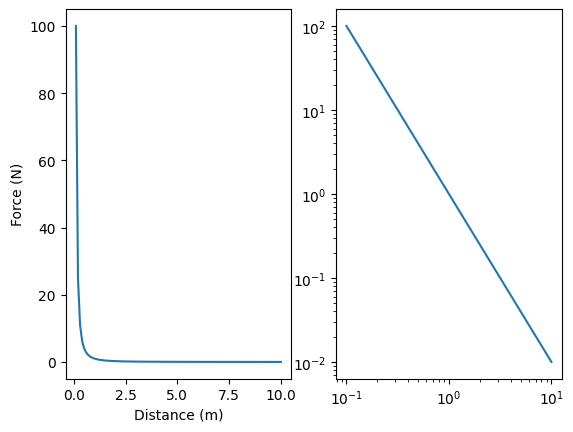

In [ ]:
''' Supporting plots '''
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.1,10,100)
y = 1 / pow(x, 2)
f, ax = plt.subplots(1, 2)
ax[0].plot(x, y)
ax[0].set_xlabel('Distance (m)')
ax[0].set_ylabel('Force (N)')
ax[1].plot(x, y)
ax[1].loglog()
